# Candlestick Doji

https://www.investopedia.com/terms/d/doji.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Doji

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

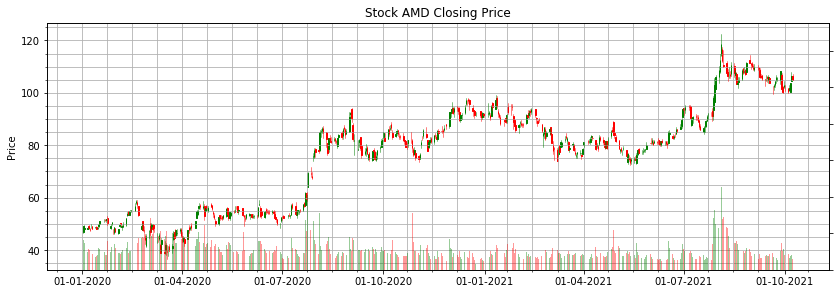

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
doji = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])

doji = doji[doji != 0]

In [6]:
df['Doji'] = talib.CDLDOJI(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['Doji'] !=0]

,Open,High,Low,Close,Adj Close,Volume,Doji
Date,,,,,,,
2020-01-21,50.959999,51.810001,50.700001,51.049999,51.049999,49095000,100
2020-02-14,55.189999,55.400002,54.560001,55.310001,55.310001,52365400,100
2020-02-26,47.700001,49.290001,47.070000,47.490002,47.490002,86378400,100
2020-03-02,47.419998,47.680000,44.660000,47.459999,47.459999,102324700,100
2020-03-09,43.029999,46.340000,42.509998,43.270000,43.270000,80859800,100
2020-03-10,45.410000,45.439999,43.099998,45.380001,45.380001,76228200,100
2020-03-19,39.560001,41.700001,37.689999,39.820000,39.820000,88939000,100
2020-03-27,46.320000,47.980000,45.900002,46.580002,46.580002,74599200,100
2020-05-20,56.549999,56.980000,55.630001,56.389999,56.389999,50888200,100


In [8]:
df['Adj Close'].loc[df['Doji'] !=0]

Date
2020-01-21     51.049999
2020-02-14     55.310001
2020-02-26     47.490002
2020-03-02     47.459999
2020-03-09     43.270000
2020-03-10     45.380001
2020-03-19     39.820000
2020-03-27     46.580002
2020-05-20     56.389999
2020-06-02     53.540001
2020-06-04     52.630001
2020-06-05     53.099998
2020-06-19     54.230000
2020-06-22     54.759998
2020-06-29     50.279999
2020-07-01     52.580002
2020-07-27     68.970001
2020-08-05     85.309998
2020-08-17     82.419998
2020-09-01     92.180000
2020-09-30     81.989998
2020-10-15     83.129997
2020-10-22     79.419998
2020-11-05     83.000000
2020-11-23     85.309998
2020-12-11     91.650002
2020-12-16     96.849998
2020-12-22     93.160004
2020-12-24     91.809998
2021-01-04     92.300003
2021-01-19     89.449997
2021-01-25     94.129997
2021-01-26     94.709999
2021-02-05     87.900002
2021-02-11     92.660004
2021-02-19     89.580002
2021-03-29     77.139999
2021-04-08     83.349998
2021-04-09     82.760002
2021-05-06     77.88

In [9]:
df['Adj Close'].loc[df['Doji'] !=0].index

DatetimeIndex(['2020-01-21', '2020-02-14', '2020-02-26', '2020-03-02',
               '2020-03-09', '2020-03-10', '2020-03-19', '2020-03-27',
               '2020-05-20', '2020-06-02', '2020-06-04', '2020-06-05',
               '2020-06-19', '2020-06-22', '2020-06-29', '2020-07-01',
               '2020-07-27', '2020-08-05', '2020-08-17', '2020-09-01',
               '2020-09-30', '2020-10-15', '2020-10-22', '2020-11-05',
               '2020-11-23', '2020-12-11', '2020-12-16', '2020-12-22',
               '2020-12-24', '2021-01-04', '2021-01-19', '2021-01-25',
               '2021-01-26', '2021-02-05', '2021-02-11', '2021-02-19',
               '2021-03-29', '2021-04-08', '2021-04-09', '2021-05-06',
               '2021-05-07', '2021-05-24', '2021-06-07', '2021-06-14',
               '2021-06-23', '2021-07-13', '2021-07-20', '2021-07-26',
               '2021-08-06', '2021-08-11', '2021-08-19', '2021-08-20',
               '2021-08-25', '2021-09-14', '2021-09-20', '2021-10-01'],
     

In [10]:
doji

Date
2020-01-21    100
2020-02-14    100
2020-02-26    100
2020-03-02    100
2020-03-09    100
2020-03-10    100
2020-03-19    100
2020-03-27    100
2020-05-20    100
2020-06-02    100
2020-06-04    100
2020-06-05    100
2020-06-19    100
2020-06-22    100
2020-06-29    100
2020-07-01    100
2020-07-27    100
2020-08-05    100
2020-08-17    100
2020-09-01    100
2020-09-30    100
2020-10-15    100
2020-10-22    100
2020-11-05    100
2020-11-23    100
2020-12-11    100
2020-12-16    100
2020-12-22    100
2020-12-24    100
2021-01-04    100
2021-01-19    100
2021-01-25    100
2021-01-26    100
2021-02-05    100
2021-02-11    100
2021-02-19    100
2021-03-29    100
2021-04-08    100
2021-04-09    100
2021-05-06    100
2021-05-07    100
2021-05-24    100
2021-06-07    100
2021-06-14    100
2021-06-23    100
2021-07-13    100
2021-07-20    100
2021-07-26    100
2021-08-06    100
2021-08-11    100
2021-08-19    100
2021-08-20    100
2021-08-25    100
2021-09-14    100
2021-09-20    100
2021-

In [11]:
doji.index

DatetimeIndex(['2020-01-21', '2020-02-14', '2020-02-26', '2020-03-02',
               '2020-03-09', '2020-03-10', '2020-03-19', '2020-03-27',
               '2020-05-20', '2020-06-02', '2020-06-04', '2020-06-05',
               '2020-06-19', '2020-06-22', '2020-06-29', '2020-07-01',
               '2020-07-27', '2020-08-05', '2020-08-17', '2020-09-01',
               '2020-09-30', '2020-10-15', '2020-10-22', '2020-11-05',
               '2020-11-23', '2020-12-11', '2020-12-16', '2020-12-22',
               '2020-12-24', '2021-01-04', '2021-01-19', '2021-01-25',
               '2021-01-26', '2021-02-05', '2021-02-11', '2021-02-19',
               '2021-03-29', '2021-04-08', '2021-04-09', '2021-05-06',
               '2021-05-07', '2021-05-24', '2021-06-07', '2021-06-14',
               '2021-06-23', '2021-07-13', '2021-07-20', '2021-07-26',
               '2021-08-06', '2021-08-11', '2021-08-19', '2021-08-20',
               '2021-08-25', '2021-09-14', '2021-09-20', '2021-10-01'],
     

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,Doji
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0
2021-10-06,100.449997,103.720001,100.349998,103.639999,103.639999,39071700,0


Text(0, 0.5, 'Price')

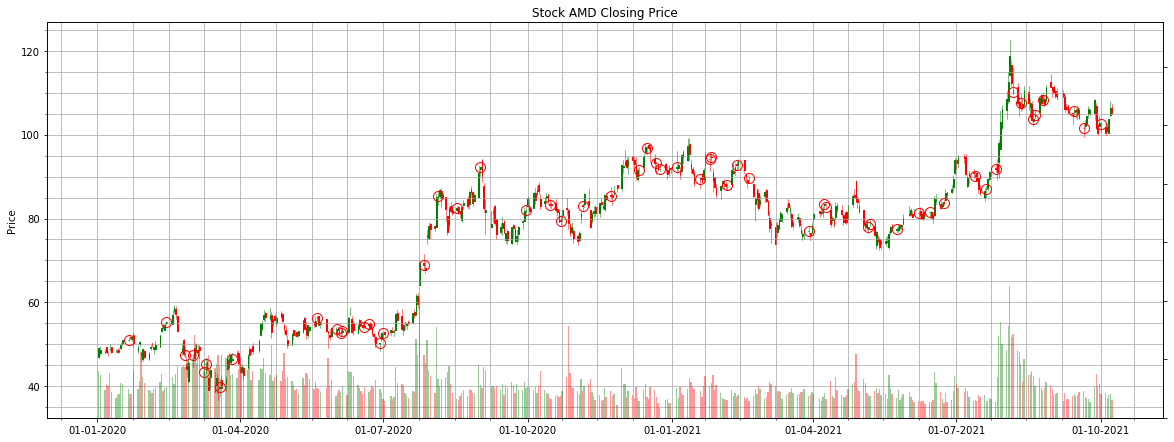

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Doji'] !=0].index, df['Adj Close'].loc[df['Doji'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Doji,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,100,False


Text(0, 0.5, 'Price')

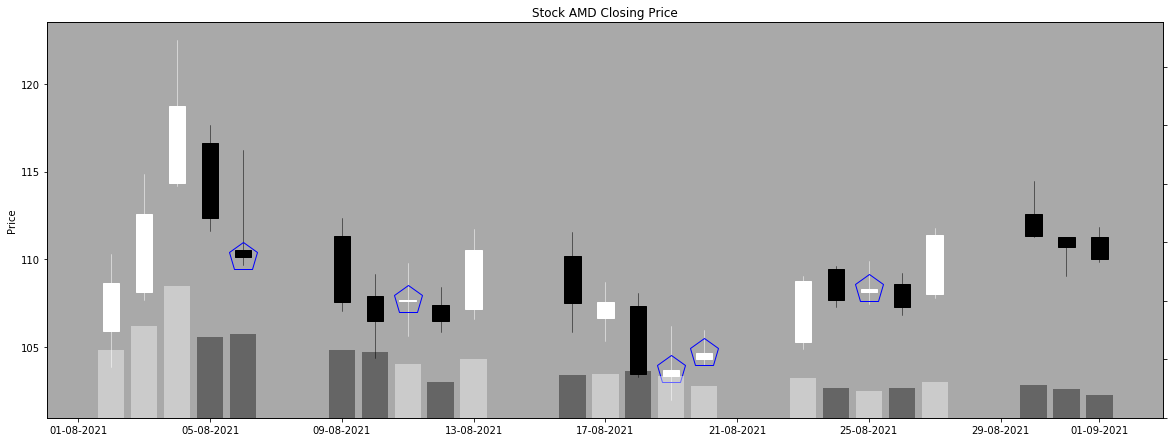

In [17]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('darkgrey')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='w', colordown='k', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Doji'] !=0].index, df['Adj Close'].loc[df['Doji'] !=0],
                'pb', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'w', False: 'k'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

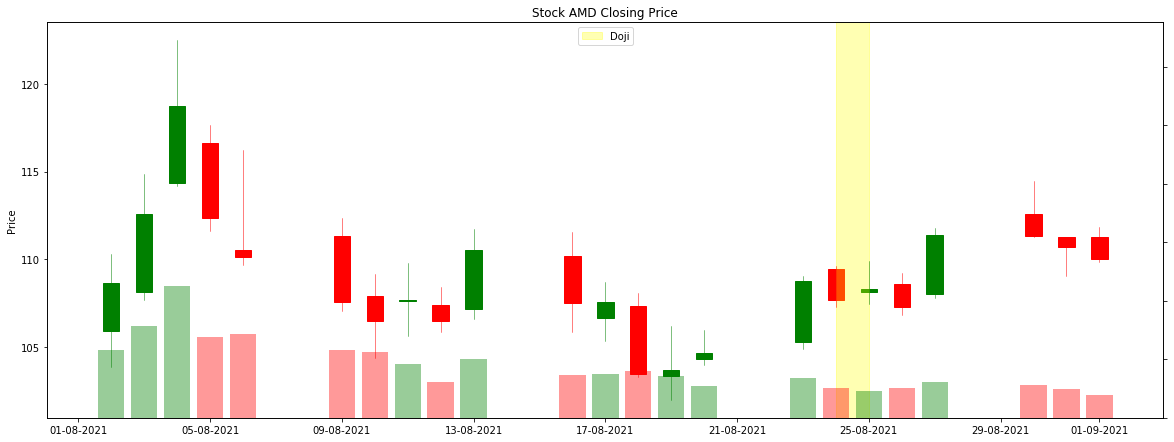

In [18]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,24)), date2num(datetime(2021,8,25)), 
           label="Doji",color="yellow", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')